In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns


from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [86]:
#Reading the dataset

df=pd.read_excel("CHURNDATA (1).xlsx")
df.head(5)

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,...,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,...,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,...,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,...,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,...,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,...,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


### Exploratory Data Analysis

In [3]:
#Getting the number of rows and columns
df.shape

(1249, 28)

In [4]:
#Datatypes of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CIF                                 1249 non-null   object        
 1   CUS_DOB                             1249 non-null   object        
 2   AGE                                 1249 non-null   int64         
 3   CUS_Month_Income                    1238 non-null   float64       
 4   CUS_Gender                          1247 non-null   object        
 5   CUS_Marital_Status                  1249 non-null   object        
 6   CUS_Customer_Since                  1249 non-null   datetime64[ns]
 7   YEARS_WITH_US                       1249 non-null   int64         
 8   # total debit transactions for S1   1249 non-null   int64         
 9   # total debit transactions for S2   1249 non-null   int64         
 10  # total debit transactio

In [5]:
#Dataframe for numerical column
df_num=df.select_dtypes(include='number')
df_num.head(3)

,AGE,CUS_Month_Income,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,...,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target
0,49,7116.64,25,277,265,345,1459126.64,1230543.08,2068641.91,10,...,31,1516981.1,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231
1,46,1500000.00,14,37,15,45,35372.55,20134.00,83856.67,2,...,4,10000.0,19500.00,57500.00,139363.22,97,87000.00,10,107,2223
2,53,5000000.00,14,31,14,8,28248.85,4777.66,4348.95,14,...,5,709625.0,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222


In [6]:
#Column names of df_num
df_num.columns

Index(['AGE', 'CUS_Month_Income', 'YEARS_WITH_US',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target'],
      dtype='object')

In [7]:
#Summary of numerical variables
df_num.describe()

,AGE,CUS_Month_Income,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,...,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target
count,1249.000000,1.238000e+03,1249.000000,1249.000000,1249.000000,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,...,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1249.000000,1.249000e+03,1249.000000,1249.000000,1249.000000
mean,46.746998,2.764869e+06,14.116894,54.262610,55.680544,56.966373,3.147439e+05,3.090418e+05,3.061457e+05,7.613291,...,8.675741,3.089540e+05,3.173819e+05,3.020052e+05,9.299314e+05,166.909528,9.283411e+05,24.559648,191.469175,2222.296237
std,12.315109,5.406761e+06,2.279882,80.732325,81.020146,84.649516,1.513433e+06,1.293928e+06,9.385775e+05,13.543207,...,14.087572,1.631418e+06,1.048443e+06,1.273680e+06,3.142967e+06,235.386076,3.685585e+06,38.467079,263.353988,3.314255
min,14.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,2211.000000
25%,39.000000,7.568750e+03,14.000000,7.000000,6.000000,6.000000,1.155000e+04,1.122578e+04,7.085000e+03,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.642350e+04,26.000000,1.511744e+04,2.000000,33.000000,2222.000000
50%,46.000000,1.500000e+06,14.000000,22.000000,24.000000,24.000000,5.395632e+04,6.158130e+04,5.907391e+04,6.000000,...,6.000000,4.522084e+04,4.679082e+04,4.952000e+04,2.031400e+05,74.000000,1.525319e+05,18.000000,90.000000,2223.000000
75%,55.000000,3.000000e+06,14.000000,65.000000,65.000000,68.000000,1.892775e+05,2.096500e+05,2.250619e+05,8.000000,...,10.000000,1.720000e+05,1.872971e+05,1.950319e+05,6.613808e+05,196.000000,5.853255e+05,28.000000,227.000000,2223.000000
max,119.000000,8.000000e+07,28.000000,715.000000,547.000000,757.000000,3.573349e+07,3.723382e+07,1.866511e+07,189.000000,...,169.000000,4.920688e+07,1.753799e+07,3.764708e+07,6.997262e+07,1859.000000,1.043919e+08,429.000000,2174.000000,2236.000000


In [87]:
#Dataframe for categorical column
df_cat=df.select_dtypes(include='object')
df_cat.head(3)

,CIF,CUS_DOB,CUS_Gender,CUS_Marital_Status,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,MALE,MARRIED,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,FEMALE,SINGLE,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,FEMALE,SINGLE,MIDLE,ACTIVE


In [10]:
#Summary of categorical variables
df_cat.describe()

,CIF,CUS_DOB,CUS_Gender,CUS_Marital_Status,TAR_Desc,Status
count,1249,1249,1247,1249,1249,1249
unique,1,1161,2,6,4,2
top,XXXXXX,Jan 1 1964 12:00AM,MALE,SINGLE,LOW,ACTIVE
freq,1249,8,741,879,753,1022


In [13]:
#Target Variable value counts
df['Status'].value_counts()

ACTIVE    1022
CHURN      227
Name: Status, dtype: int64

### Visualizations

<Axes: xlabel='AGE', ylabel='YEARS_WITH_US'>

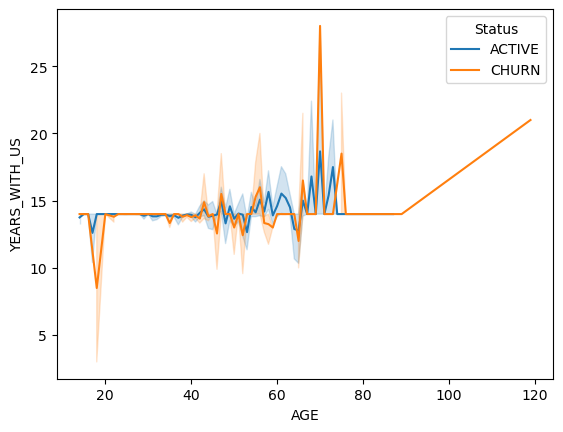

In [10]:
#Age Vs Status
sns.lineplot(x=df['AGE'],y=df['YEARS_WITH_US'],hue=df['Status'])

<Axes: xlabel='total debit amount for S1', ylabel='CUS_Month_Income'>

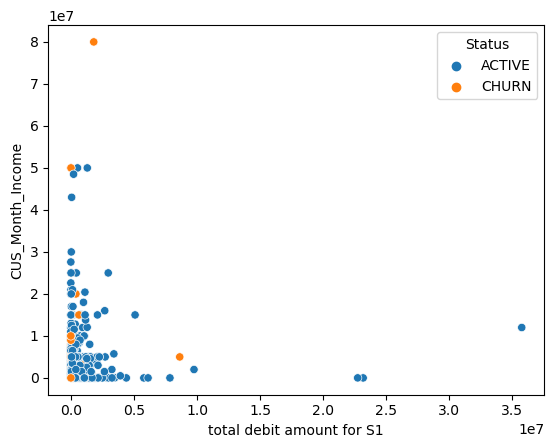

In [14]:
sns.scatterplot(hue=df['Status'],x=df['total debit amount for S1'],y=df['CUS_Month_Income'])

<Axes: xlabel='total debit amount', ylabel='total debit transactions'>

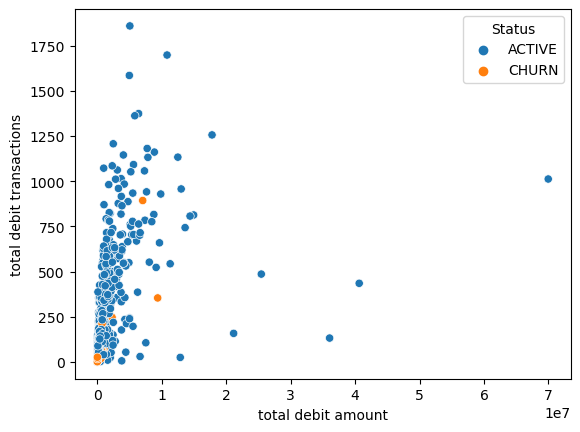

In [16]:
sns.scatterplot(hue=df['Status'],x=df['total debit amount'],y=df['total debit transactions'])

<Axes: xlabel='total credit amount', ylabel='total credit transactions'>

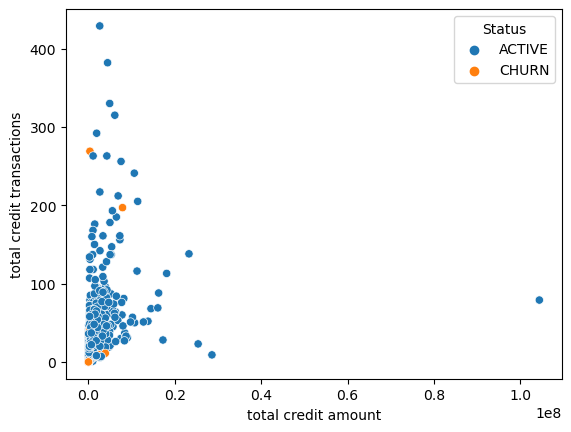

In [17]:
sns.scatterplot(hue=df['Status'],x=df['total credit amount'],y=df['total credit transactions'])

<Axes: xlabel='count', ylabel='CUS_Gender'>

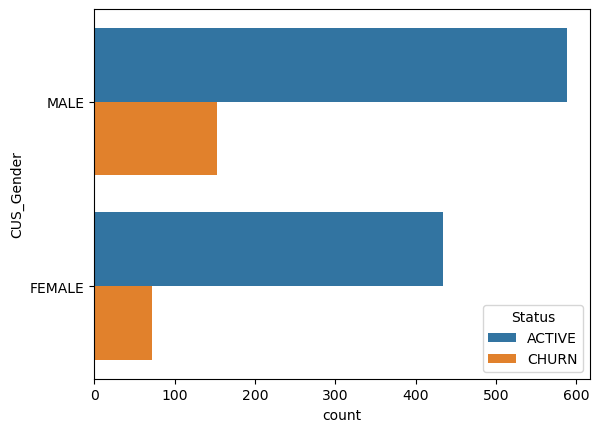

In [16]:
sns.countplot(y='CUS_Gender',hue='Status',data=df)

<Axes: xlabel='count', ylabel='CUS_Marital_Status'>

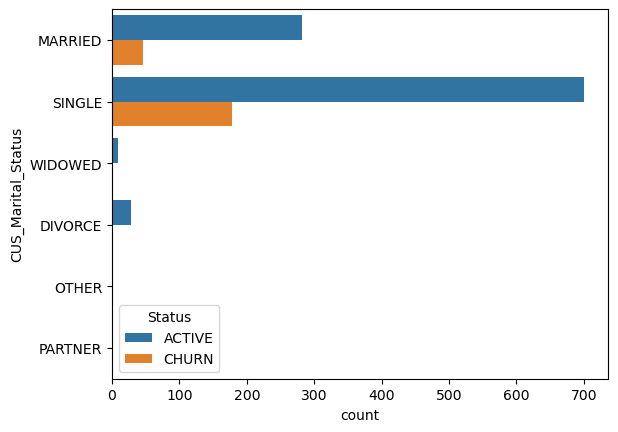

In [18]:
sns.countplot(y='CUS_Marital_Status',hue='Status',data=df)

<Axes: xlabel='count', ylabel='TAR_Desc'>

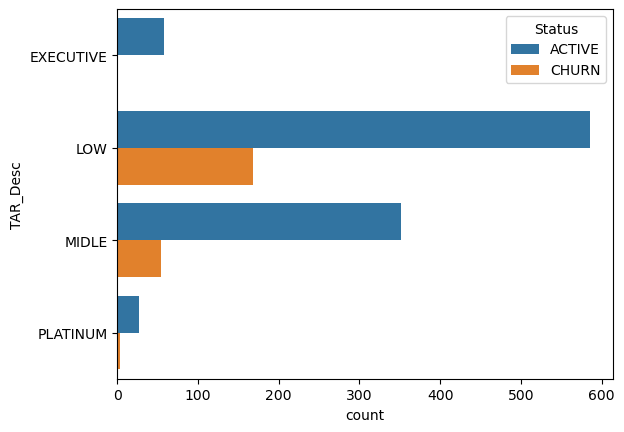

In [23]:
sns.countplot(y='TAR_Desc',hue='Status',data=df)

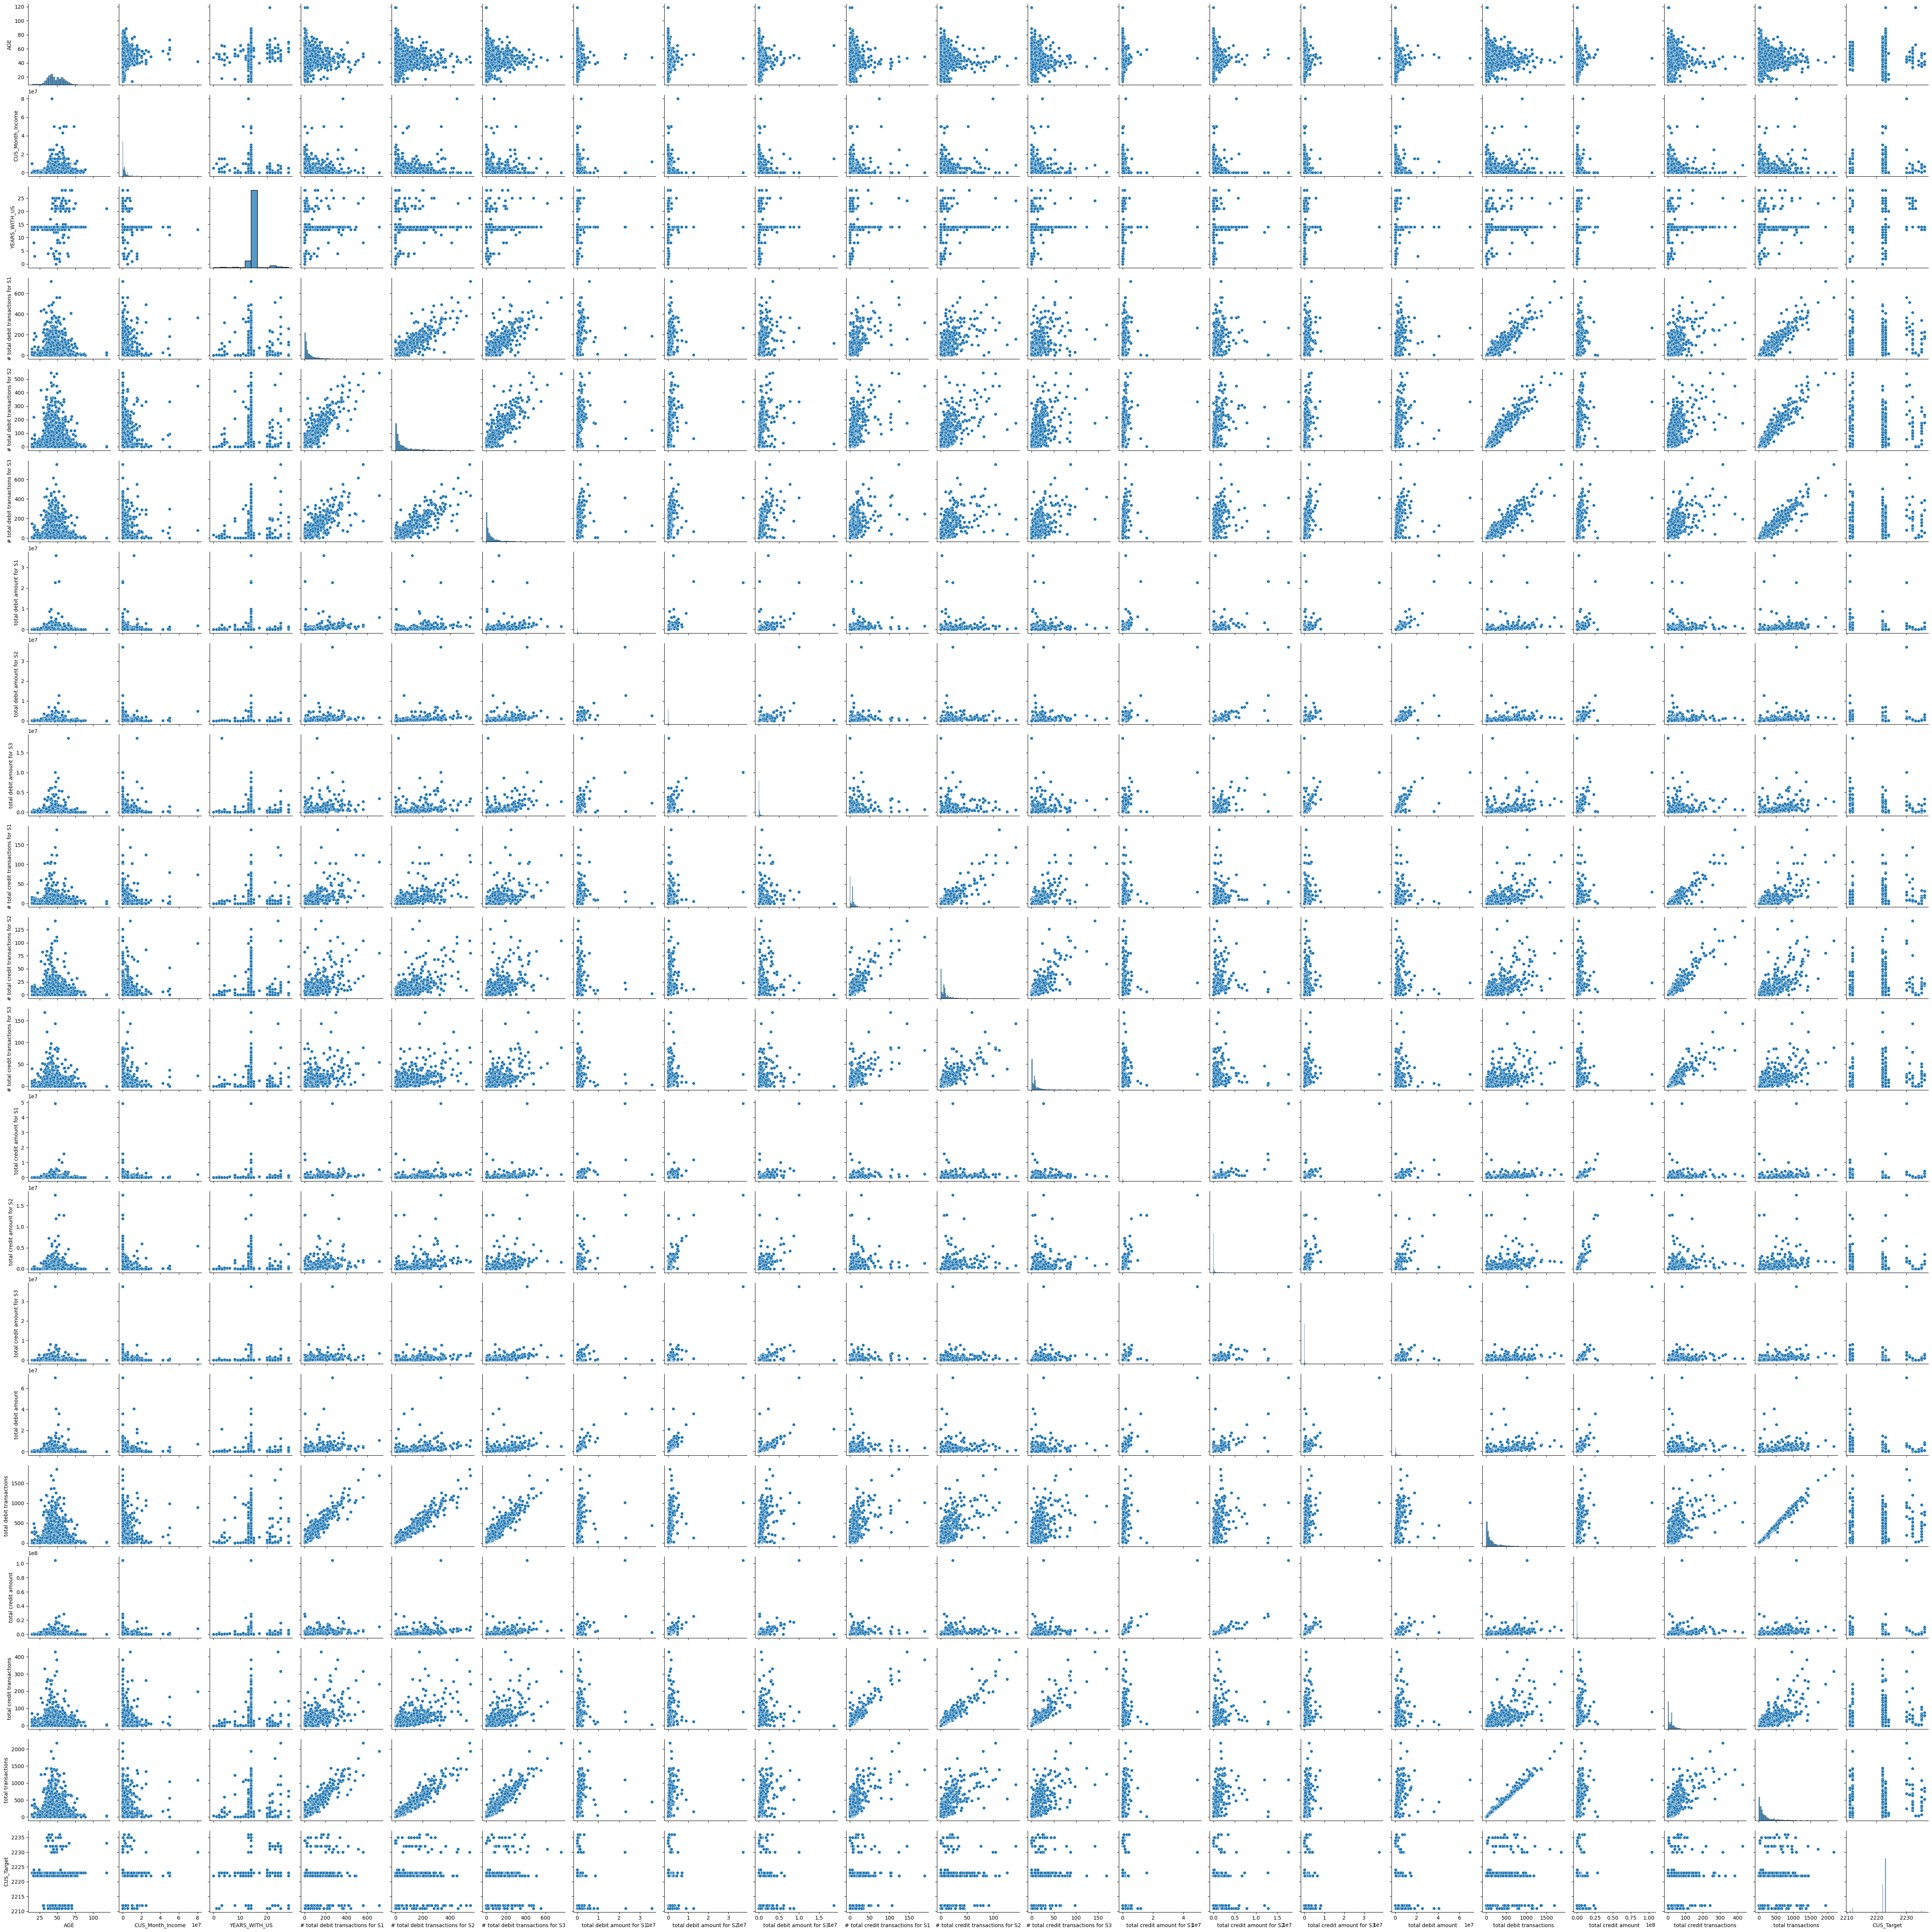

In [31]:
sns.pairplot(df)

### Feature Preprocessing

In [71]:
#Missing Value
df.isnull().sum()

CIF                                    0
CUS_DOB                                0
AGE                                    0
CUS_Month_Income                      11
CUS_Gender                             2
CUS_Marital_Status                     0
CUS_Customer_Since                     0
YEARS_WITH_US                          0
# total debit transactions for S1      0
# total debit transactions for S2      0
# total debit transactions for S3      0
total debit amount for S1              0
total debit amount for S2              0
total debit amount for S3              0
# total credit transactions for S1     0
# total credit transactions for S2     0
# total credit transactions for S3     0
total credit amount for S1             0
total credit amount for S2             0
total credit amount for S3             0
total debit amount                     0
total debit transactions               0
total credit amount                    0
total credit transactions              0
total transactio

In [32]:
#Outlier Treatment
#To determine the threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [43]:
#Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")

In [49]:
for var in df_num:
    print(has_outliers(df_num, [var]))

None
CUS_Month_Income  :  14 outliers
None
YEARS_WITH_US  :  76 outliers
None
# total debit transactions for S1  :  3 outliers
None
None
# total debit transactions for S3  :  2 outliers
None
total debit amount for S1  :  15 outliers
None
total debit amount for S2  :  15 outliers
None
total debit amount for S3  :  24 outliers
None
# total credit transactions for S1  :  16 outliers
None
# total credit transactions for S2  :  15 outliers
None
# total credit transactions for S3  :  12 outliers
None
total credit amount for S1  :  21 outliers
None
total credit amount for S2  :  13 outliers
None
total credit amount for S3  :  14 outliers
None
total debit amount  :  15 outliers
None
total debit transactions  :  2 outliers
None
total credit amount  :  13 outliers
None
total credit transactions  :  14 outliers
None
total transactions  :  2 outliers
None
None


In [50]:
df.YEARS_WITH_US.value_counts()

14    1074
13      93
21      16
25       7
23       7
28       6
4        5
22       5
24       5
8        4
20       4
3        3
2        3
12       3
15       3
11       2
10       2
9        2
6        1
1        1
5        1
17       1
0        1
Name: YEARS_WITH_US, dtype: int64

In [51]:
df['total debit amount'].value_counts()

0.00         12
800.00        4
1443.30       4
693.60        4
1700.34       3
             ..
150743.30     1
339145.80     1
3896.37       1
83974.21      1
761827.91     1
Name: total debit amount, Length: 1219, dtype: int64

In [53]:
#Scaling Numerical Values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_num_scaled=sc.fit_transform(df_num)
df_num_scaled

array([[ 0.18301949, -0.51026233,  4.77545078, ...,  1.05171882,
         2.88902199,  2.62721137],
       [-0.0606813 , -0.23403659, -0.05129227, ..., -0.37864792,
        -0.32087234,  0.21242929],
       [ 0.50795387,  0.41356264, -0.05129227, ...,  0.06346543,
        -0.42343701, -0.08941847],
       ...,
       [-1.03548446, -0.51139408, -0.05129227, ...,  5.00473235,
         4.68200439,  2.92905912],
       [ 1.80769141, -0.14152241, -0.05129227, ...,  0.60960546,
         1.66964202, -0.08941847],
       [ 0.91412185,  0.41356264, -0.05129227, ...,  0.32353211,
         0.29831438, -0.08941847]])

### Encoding Categorical Variables

In [88]:
#Encoding Categorical values
gender={"MALE":0,"FEMALE":1}
tar_desc={"LOW":0,"MIDLE":1,"EXECUTIVE":2,"PLATINUM":3}
df_cat['CUS_Gender']=df_cat['CUS_Gender'].map(gender)
df_cat['TAR_Desc']=df_cat['TAR_Desc'].map(tar_desc)
df_cat.head(3)

,CIF,CUS_DOB,CUS_Gender,CUS_Marital_Status,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,0.0,MARRIED,2,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,1.0,SINGLE,0,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,1.0,SINGLE,1,ACTIVE


In [89]:
df_cat = pd.get_dummies(df_cat, columns = ['CUS_Marital_Status'], drop_first = True)
df_cat.head(4)

,CIF,CUS_DOB,CUS_Gender,TAR_Desc,Status,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED
0,XXXXXX,Feb 13 1970 12:00AM,0.0,2,ACTIVE,1,0,0,0,0
1,XXXXXX,Sep 20 1973 12:00AM,1.0,0,ACTIVE,0,0,0,1,0
2,XXXXXX,Jul 18 1966 12:00AM,1.0,1,ACTIVE,0,0,0,1,0
3,XXXXXX,Jan 9 2004 12:00AM,1.0,0,ACTIVE,0,0,0,1,0


In [83]:
df_cat.columns

Index(['CIF', 'CUS_DOB', 'CUS_Gender', 'TAR_Desc', 'Status',
       'CUS_Marital_Status_MARRIED', 'CUS_Marital_Status_OTHER',
       'CUS_Marital_Status_PARTNER', 'CUS_Marital_Status_SINGLE',
       'CUS_Marital_Status_WIDOWED'],
      dtype='object')

In [90]:
#Dropping CIF and CUS_DOB from categorical dataset
df_cat.drop(df_cat.iloc[:,0:2],inplace=True,axis=1)
df_cat.head(3)

,CUS_Gender,TAR_Desc,Status,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED
0,0.0,2,ACTIVE,1,0,0,0,0
1,1.0,0,ACTIVE,0,0,0,1,0
2,1.0,1,ACTIVE,0,0,0,1,0


In [91]:
df_num.columns

Index(['AGE', 'CUS_Month_Income', 'YEARS_WITH_US',
       '# total debit transactions for S1',
       '# total debit transactions for S2',
       '# total debit transactions for S3', 'total debit amount for S1',
       'total debit amount for S2', 'total debit amount for S3',
       '# total credit transactions for S1',
       '# total credit transactions for S2',
       '# total credit transactions for S3', 'total credit amount for S1',
       'total credit amount for S2', 'total credit amount for S3',
       'total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target'],
      dtype='object')

In [93]:
#Dropping few columns for our final set from numerical dataset
df_num.drop(df_num.iloc[:,3:15],axis=1,inplace=True)
df_num.columns

Index(['AGE', 'CUS_Month_Income', 'YEARS_WITH_US', 'total debit amount',
       'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target'],
      dtype='object')

#### Overall dataframe

In [95]:
#Overall dataframe
df_overall=pd.concat([df_num,df_cat],axis=1)
df_overall.head(3)

,AGE,CUS_Month_Income,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,CUS_Gender,TAR_Desc,Status,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED
0,49,7116.64,25,4758311.63,887,5659653.33,65,952,2231,0.0,2,ACTIVE,1,0,0,0,0
1,46,1500000.00,14,139363.22,97,87000.00,10,107,2223,1.0,0,ACTIVE,0,0,0,1,0
2,53,5000000.00,14,37375.46,53,1020883.70,27,80,2222,1.0,1,ACTIVE,0,0,0,1,0


In [96]:
df_overall.columns

Index(['AGE', 'CUS_Month_Income', 'YEARS_WITH_US', 'total debit amount',
       'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions', 'CUS_Target',
       'CUS_Gender', 'TAR_Desc', 'Status', 'CUS_Marital_Status_MARRIED',
       'CUS_Marital_Status_OTHER', 'CUS_Marital_Status_PARTNER',
       'CUS_Marital_Status_SINGLE', 'CUS_Marital_Status_WIDOWED'],
      dtype='object')

In [97]:
df_overall.shape

(1249, 17)

In [98]:
df_overall.describe()

,AGE,CUS_Month_Income,YEARS_WITH_US,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,CUS_Gender,TAR_Desc,CUS_Marital_Status_MARRIED,CUS_Marital_Status_OTHER,CUS_Marital_Status_PARTNER,CUS_Marital_Status_SINGLE,CUS_Marital_Status_WIDOWED
count,1249.000000,1.238000e+03,1249.000000,1.249000e+03,1249.000000,1.249000e+03,1249.000000,1249.000000,1249.000000,1247.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000
mean,46.746998,2.764869e+06,14.116894,9.299314e+05,166.909528,9.283411e+05,24.559648,191.469175,2222.296237,0.405774,0.493995,0.262610,0.000801,0.000801,0.703763,0.008006
std,12.315109,5.406761e+06,2.279882,3.142967e+06,235.386076,3.685585e+06,38.467079,263.353988,3.314255,0.491238,0.702676,0.440229,0.028296,0.028296,0.456780,0.089155
min,14.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,2211.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,7.568750e+03,14.000000,5.642350e+04,26.000000,1.511744e+04,2.000000,33.000000,2222.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,1.500000e+06,14.000000,2.031400e+05,74.000000,1.525319e+05,18.000000,90.000000,2223.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,3.000000e+06,14.000000,6.613808e+05,196.000000,5.853255e+05,28.000000,227.000000,2223.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,119.000000,8.000000e+07,28.000000,6.997262e+07,1859.000000,1.043919e+08,429.000000,2174.000000,2236.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

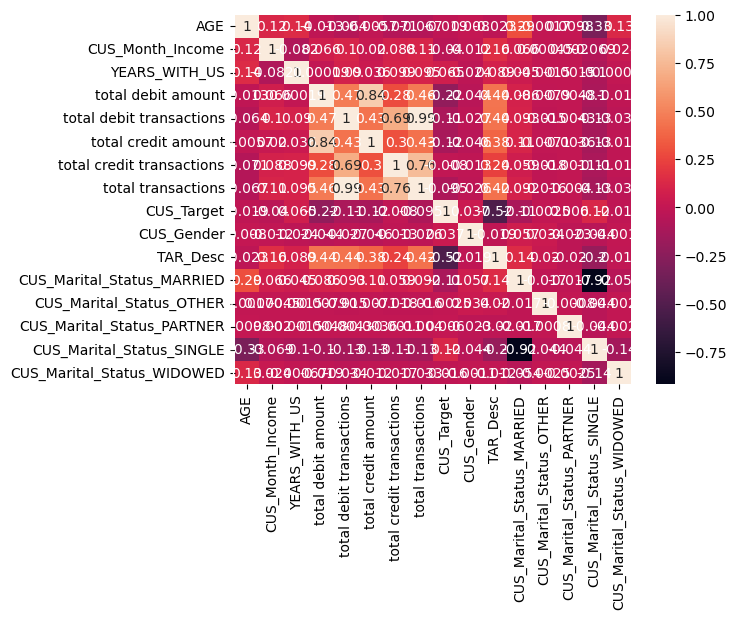

In [99]:
sns.heatmap(df_overall.corr(),annot=True)